## **Functions**

In [61]:
import shutil
from collections.abc import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show() 

def to_sequences(seq_size, data):
    x = []
    y = []
    for i in range(len(data)-SEQUENCE_SIZE-1):
        #print(i)
        window = data[i:(i+SEQUENCE_SIZE)]
        after_window = data[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


## **Loading Data**

In [62]:
import os
import io
import requests
import sklearn
from aeon.datasets import load_classification
X, y, meta_data = load_classification("Tiselac")
print(" Shape of X = ", X.shape)
print(" Shape of y = ", y.shape)
print(" Meta data = ", meta_data)

 Shape of X =  (99687, 10, 23)
 Shape of y =  (99687,)
 Meta data =  {'problemname': 'tiselac', 'timestamps': False, 'missing': False, 'univariate': False, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2', '3', '4', '5', '6', '7', '8', '9']}


## **Splitting Data to Train and Test**

In [63]:
X_train, y_train = load_classification(
    "Tiselac", extract_path="./Temp/", split="TRAIN", return_metadata=False
)
X_test, y_test = load_classification(
    "Tiselac", extract_path="./Temp/", split="test", return_metadata=False
)
print("Train shape = ", X_train.shape)
print("Test shape = ", X_test.shape)
print("Train shape = ", y_train.shape)
print("Test shape = ", y_test.shape)

Train shape =  (81714, 10, 23)
Test shape =  (17973, 10, 23)
Train shape =  (81714,)
Test shape =  (17973,)


In [79]:
X

array([[[  26.,   26.,   26., ...,    9.,    9.,    9.],
        [  26.,   26.,   26., ...,   16.,   16.,   16.],
        [  35.,   35.,   35., ...,   61.,   61.,   61.],
        ...,
        [ 282.,  282.,  282., ...,  766.,  766.,  766.],
        [ 132.,  132.,  132., ..., -204., -204., -204.],
        [ 148.,  148.,  148., ...,  469.,  469.,  469.]],

       [[  47.,   47.,   47., ...,   62.,   62.,   62.],
        [  52.,   52.,   52., ...,   70.,   70.,   70.],
        [  80.,   80.,   80., ...,   89.,   89.,   89.],
        ...,
        [ 661.,  661.,  661., ...,  351.,  351.,  351.],
        [-320., -320., -320., ...,  -40.,  -40.,  -40.],
        [ 408.,  408.,  408., ...,  372.,  372.,  372.]],

       [[   0.,    0.,    0., ...,   34.,   33.,   33.],
        [   0.,    0.,    0., ...,   37.,   36.,   36.],
        [  35.,   35.,   35., ...,   70.,   69.,   69.],
        ...,
        [ 949.,  949.,  949., ...,  720.,  733.,  733.],
        [-347., -347., -347., ..., -317., -32

In [65]:
X.dtype

dtype('float64')

In [66]:
y

array(['6', '1', '6', ..., '3', '4', '5'], dtype='<U1')

In [67]:
first = X_train[1]

pd.DataFrame(first)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,47.0,47.0,47.0,47.0,47.0,25.0,13.0,20.0,27.0,34.0,...,61.0,65.0,67.0,56.0,60.0,62.0,62.0,62.0,62.0,62.0
1,52.0,52.0,52.0,52.0,52.0,23.0,6.0,15.0,24.0,33.0,...,68.0,70.0,73.0,69.0,69.0,70.0,70.0,70.0,70.0,70.0
2,80.0,80.0,80.0,80.0,80.0,55.0,39.0,43.0,47.0,51.0,...,89.0,92.0,92.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0
3,68.0,68.0,68.0,68.0,68.0,37.0,17.0,26.0,34.0,43.0,...,96.0,105.0,113.0,107.0,106.0,106.0,106.0,106.0,106.0,106.0
4,334.0,334.0,334.0,334.0,334.0,394.0,412.0,361.0,311.0,260.0,...,234.0,246.0,254.0,219.0,220.0,221.0,221.0,221.0,221.0,221.0
5,172.0,172.0,172.0,172.0,172.0,164.0,153.0,144.0,136.0,128.0,...,206.0,245.0,265.0,217.0,208.0,204.0,204.0,204.0,204.0,204.0
6,99.0,99.0,99.0,99.0,99.0,85.0,73.0,71.0,69.0,67.0,...,153.0,210.0,181.0,157.0,147.0,143.0,143.0,143.0,143.0,143.0
7,661.0,661.0,661.0,661.0,661.0,828.0,920.0,865.0,802.0,716.0,...,418.0,401.0,384.0,343.0,349.0,351.0,351.0,351.0,351.0,351.0
8,-320.0,-320.0,-320.0,-320.0,-320.0,-412.0,-458.0,-429.0,-391.0,-340.0,...,-63.0,-2.0,21.0,-4.0,-28.0,-40.0,-40.0,-40.0,-40.0,-40.0
9,408.0,408.0,408.0,408.0,408.0,441.0,447.0,399.0,353.0,308.0,...,382.0,439.0,445.0,383.0,374.0,372.0,372.0,372.0,372.0,372.0


In [68]:
print(X_train.shape)

(81714, 10, 23)


## **Converting X to 4D Array**

In [69]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define batch_size and # of epochs
batch_size = 128

# define input image dimensions
rows, cols = 10, 23

X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)

print(X_train.shape)
print(X_test.shape)

(81714, 10, 23, 1)
(17973, 10, 23, 1)


In [70]:
y_train.dtype

dtype('<U1')

## **Normalization**

In [71]:
# convert to float32 for normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [72]:
# normalize the data values to the range [0, 1]
X_train /= 255
X_test /= 255

In [73]:
X_train

array([[[[ 0.10196079],
         [ 0.10196079],
         [ 0.10196079],
         ...,
         [ 0.03529412],
         [ 0.03529412],
         [ 0.03529412]],

        [[ 0.10196079],
         [ 0.10196079],
         [ 0.10196079],
         ...,
         [ 0.0627451 ],
         [ 0.0627451 ],
         [ 0.0627451 ]],

        [[ 0.13725491],
         [ 0.13725491],
         [ 0.13725491],
         ...,
         [ 0.23921569],
         [ 0.23921569],
         [ 0.23921569]],

        ...,

        [[ 1.1058824 ],
         [ 1.1058824 ],
         [ 1.1058824 ],
         ...,
         [ 3.0039215 ],
         [ 3.0039215 ],
         [ 3.0039215 ]],

        [[ 0.5176471 ],
         [ 0.5176471 ],
         [ 0.5176471 ],
         ...,
         [-0.8       ],
         [-0.8       ],
         [-0.8       ]],

        [[ 0.5803922 ],
         [ 0.5803922 ],
         [ 0.5803922 ],
         ...,
         [ 1.8392156 ],
         [ 1.8392156 ],
         [ 1.8392156 ]]],


       [[[ 0.18431373],


In [74]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print("Training samples: {}".format(X_train.shape[0]))
print("Test samples: {}".format(X_test.shape[0]))

x_train shape: (81714, 10, 23, 1)
x_test shape: (17973, 10, 23, 1)
Training samples: 81714
Test samples: 17973


In [75]:
set(y)

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

## **convert Y to one hot-encoded Format**

In [76]:
from sklearn import preprocessing

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [77]:
y_train.shape, y_test.shape

((81714, 9), (17973, 9))

## **Building CNN Classification Model (Relu & Adam)**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 21, 32)         320       
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 19, 64)         18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 3, 9, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 1728)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               221312    
                                                      

Epoch 1/30
639/639 - 9s - loss: 0.8322 - accuracy: 0.7444 - val_loss: 0.5718 - val_accuracy: 0.8204 - 9s/epoch - 14ms/step
Epoch 2/30
639/639 - 9s - loss: 0.6351 - accuracy: 0.8040 - val_loss: 0.5038 - val_accuracy: 0.8394 - 9s/epoch - 14ms/step
Epoch 3/30
639/639 - 9s - loss: 0.5700 - accuracy: 0.8220 - val_loss: 0.4530 - val_accuracy: 0.8521 - 9s/epoch - 14ms/step
Epoch 4/30
639/639 - 9s - loss: 0.5293 - accuracy: 0.8329 - val_loss: 0.4361 - val_accuracy: 0.8573 - 9s/epoch - 14ms/step
Epoch 5/30
639/639 - 9s - loss: 0.4966 - accuracy: 0.8432 - val_loss: 0.4058 - val_accuracy: 0.8720 - 9s/epoch - 14ms/step
Epoch 6/30
639/639 - 9s - loss: 0.4790 - accuracy: 0.8472 - val_loss: 0.3869 - val_accuracy: 0.8785 - 9s/epoch - 14ms/step
Epoch 7/30
639/639 - 10s - loss: 0.4600 - accuracy: 0.8539 - val_loss: 0.3575 - val_accuracy: 0.8861 - 10s/epoch - 15ms/step
Epoch 8/30
639/639 - 10s - loss: 0.4421 - accuracy: 0.8587 - val_loss: 0.3496 - val_accuracy: 0.8907 - 10s/epoch - 15ms/step
Epoch 9/30
6

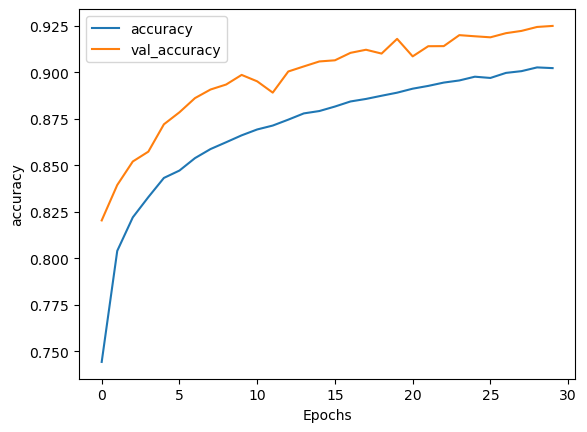

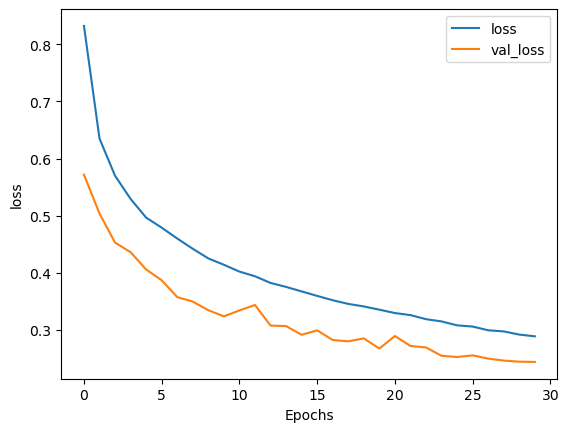

562/562 [==============================] - 1s 2ms/step
Accuracy: 0.9248873309964948
Averaged F1: 0.9243054189770137
Precision score: 0.9241330713122502
Recall score: 0.9248873309964948
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4000
           1       0.81      0.70      0.75       647
           2       0.93      0.92      0.92      4000
           3       0.94      0.95      0.94      3398
           4       0.96      0.97      0.96      2588
           5       0.88      0.91      0.89      1136
           6       0.95      0.97      0.96      1531
           7       0.49      0.47      0.48       154
           8       0.91      0.86      0.89       519

    accuracy                           0.92     17973
   macro avg       0.87      0.85      0.86     17973
weighted avg       0.92      0.92      0.92     17973



In [78]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import time
from sklearn import metrics

input_shape = (rows, cols, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                activation='relu',
                input_shape=input_shape))    #  in this case, input_shape = (img_rows, img_cols, 1)
                
# Note that number of filters from previous layer become the number of channels for current layer's input image.

model.add(Conv2D(64,(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))

model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.summary()

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001,  beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False),
              metrics=['accuracy'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


start_time = time.time()

history = model.fit(X_train, y_train,     
                batch_size=batch_size,
                epochs=30,
                callbacks=[monitor,checkpointer],
                verbose=2,
        validation_data=(X_test, y_test))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

model.load_weights('best_weights_NN.hdf5')  

# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))


## **Building CNN Classification Model (Relu & sgd)**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 21, 32)         320       
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 19, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 9, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1728)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               221312    
                                                      

Epoch 1/30
639/639 - 9s - loss: 1.3998 - accuracy: 0.5570 - val_loss: 0.9202 - val_accuracy: 0.7132 - 9s/epoch - 14ms/step
Epoch 2/30
639/639 - 9s - loss: 0.9921 - accuracy: 0.6958 - val_loss: 0.7783 - val_accuracy: 0.7535 - 9s/epoch - 14ms/step
Epoch 3/30
639/639 - 9s - loss: 0.8900 - accuracy: 0.7267 - val_loss: 0.7329 - val_accuracy: 0.7709 - 9s/epoch - 14ms/step
Epoch 4/30
639/639 - 9s - loss: 0.8406 - accuracy: 0.7399 - val_loss: 0.7045 - val_accuracy: 0.7749 - 9s/epoch - 14ms/step
Epoch 5/30
639/639 - 10s - loss: 0.8090 - accuracy: 0.7521 - val_loss: 0.6844 - val_accuracy: 0.7884 - 10s/epoch - 15ms/step
Epoch 6/30
639/639 - 10s - loss: 0.7821 - accuracy: 0.7585 - val_loss: 0.6729 - val_accuracy: 0.7867 - 10s/epoch - 15ms/step
Epoch 7/30
639/639 - 9s - loss: 0.7626 - accuracy: 0.7648 - val_loss: 0.6469 - val_accuracy: 0.8016 - 9s/epoch - 14ms/step
Epoch 8/30
639/639 - 9s - loss: 0.7449 - accuracy: 0.7710 - val_loss: 0.6258 - val_accuracy: 0.8016 - 9s/epoch - 14ms/step
Epoch 9/30
6

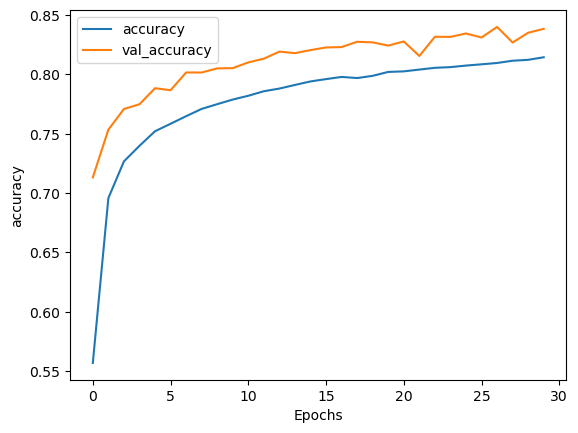

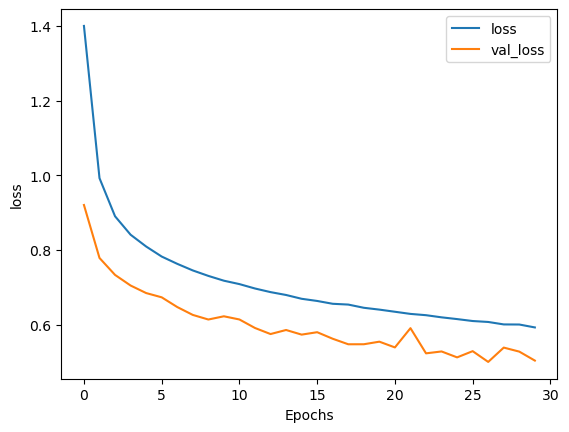

562/562 [==============================] - 1s 2ms/step
Accuracy: 0.8400378345295721
Averaged F1: 0.8332220183838345
Precision score: 0.8296811762193789
Recall score: 0.8400378345295721
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4000
           1       0.60      0.38      0.47       647
           2       0.82      0.91      0.87      4000
           3       0.84      0.84      0.84      3398
           4       0.89      0.90      0.89      2588
           5       0.72      0.71      0.72      1136
           6       0.92      0.87      0.90      1531
           7       0.00      0.00      0.00       154
           8       0.72      0.61      0.66       519

    accuracy                           0.84     17973
   macro avg       0.71      0.68      0.69     17973
weighted avg       0.83      0.84      0.83     17973



/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/skarry/anaconda3/envs/tensorflow/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

In [59]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import time
from sklearn import metrics

input_shape = (rows, cols, 1)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                activation='relu',
                input_shape=input_shape))    # in this case, input_shape = (img_rows, img_cols, 1)
                
# Note that number of filters from previous layer become the number of channels for current layer's input image.

model.add(Conv2D(64,(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))

model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1], activation='softmax'))

model.summary()

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


start_time = time.time()

history = model.fit(X_train, y_train,     
                batch_size=batch_size,
                epochs=30,
                callbacks=[monitor,checkpointer],
                verbose=2,
        validation_data=(X_test, y_test))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

model.load_weights('best_weights_NN.hdf5')  

# evaluate() computes the loss and accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

y_true = np.argmax(y_test,axis=1)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(score))

score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(score))
        
print(metrics.classification_report(y_true, pred))


## **Building CNN Classification Model (tanh & (Adam,SGD))**

Optimizer:  adam  Activation: tanh 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 10, 20, 32)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 18, 64)         18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 4, 9, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               295040    
                  

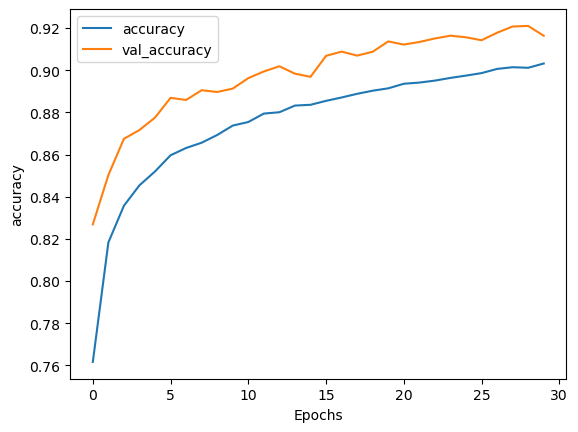

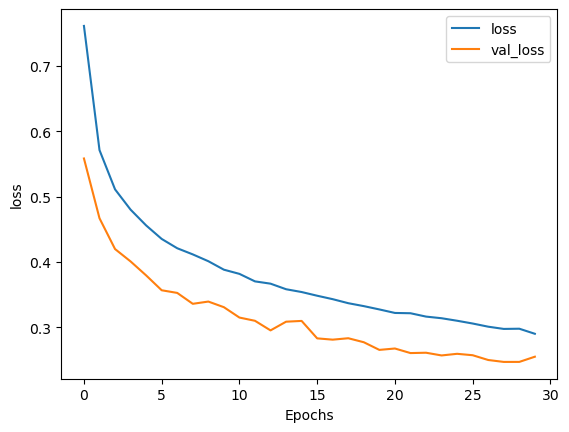

562/562 [==============================] - 1s 2ms/step
Accuracy: 0.9207144049407444
Averaged F1: 0.9203770854174413
Precision score: 0.920256006393847
Recall score: 0.9207144049407444
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4000
           1       0.76      0.80      0.78       647
           2       0.92      0.92      0.92      4000
           3       0.92      0.94      0.93      3398
           4       0.95      0.95      0.95      2588
           5       0.89      0.87      0.88      1136
           6       0.95      0.96      0.96      1531
           7       0.54      0.42      0.47       154
           8       0.87      0.88      0.88       519

    accuracy                           0.92     17973
   macro avg       0.86      0.85      0.86     17973
weighted avg       0.92      0.92      0.92     17973

Optimizer:  sgd  Activation: tanh 
Model: "sequential_3"
______________________________________________________

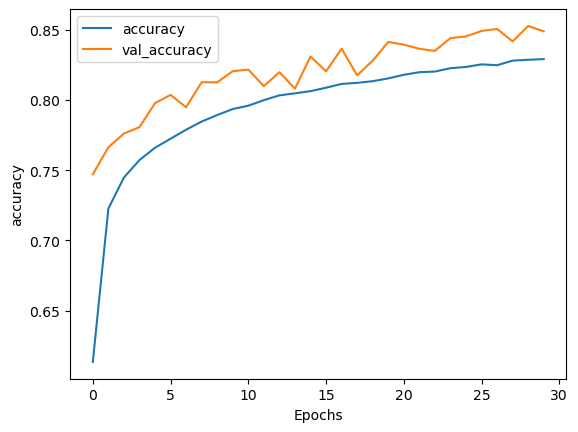

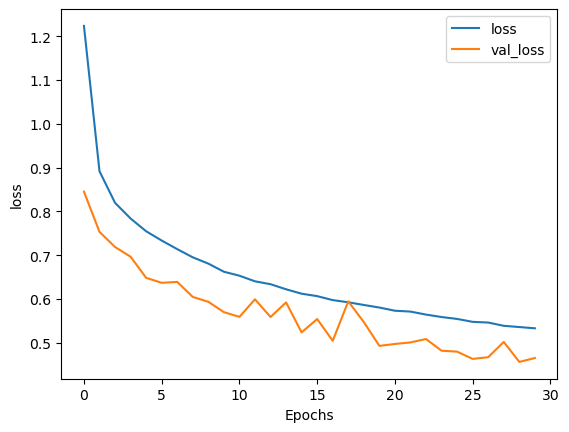

562/562 [==============================] - 1s 2ms/step
Accuracy: 0.8527235297390531
Averaged F1: 0.8476672145561475
Precision score: 0.8466234260249473
Recall score: 0.8527235297390531
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4000
           1       0.61      0.44      0.51       647
           2       0.85      0.90      0.87      4000
           3       0.86      0.86      0.86      3398
           4       0.93      0.87      0.90      2588
           5       0.74      0.76      0.75      1136
           6       0.90      0.92      0.91      1531
           7       0.30      0.04      0.07       154
           8       0.78      0.68      0.73       519

    accuracy                           0.85     17973
   macro avg       0.76      0.71      0.72     17973
weighted avg       0.85      0.85      0.85     17973



In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import time
from sklearn import metrics

input_shape = (rows, cols, 1)

# List of posible optimizers
optimizers = ['adam', 'sgd']

# Loop through all combination of optimizers and activation functions
for optimizer in optimizers:
                print("Optimizer: ", optimizer, " Activation: tanh ")
    

                model = Sequential()
                model.add(Conv2D(32, kernel_size=(1, 4), strides=(1, 1), padding='valid',
                                activation='tanh',
                                input_shape=input_shape))    #  in this case, input_shape = (img_rows, img_cols, 1)
                                
                # Note that number of filters from previous layer become the number of channels for current layer's input image.

                model.add(Conv2D(64, (3, 3), activation= "tanh"))
                model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
                model.add(Dropout(0.25)) 

                model.add(Flatten())

                model.add(Dense(128, activation= "tanh"))

                model.add(Dropout(0.5))

                model.add(Dense(y_train.shape[1], activation='softmax'))

                model.summary()

                # show not only log loss but also accuracy for each epoch using metrics=['accuracy']

                model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

                monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')
                checkpointer = ModelCheckpoint(filepath = "best_weights_NN.hdf5", verbose = 0, save_best_only = True)


                start_time = time.time()

                history = model.fit(X_train, y_train,     
                                batch_size=batch_size,
                                epochs=30,
                                callbacks=[monitor,checkpointer],
                                verbose=2,
                        validation_data=(X_test, y_test))

                elapsed_time = time.time() - start_time
                print("Elapsed time: {}".format(hms_string(elapsed_time)))

                model.load_weights('best_weights_NN.hdf5')  
                
                # evaluate() computes the loss and accuracy
                score = model.evaluate(X_test, y_test, verbose=0)
                print('Test loss: {}'.format(score[0]))
                print('Test accuracy: {}'.format(score[1]))

                # Plot the accuracy and results
                plot_graphs(history, "accuracy")
                plot_graphs(history, "loss")

                y_true = np.argmax(y_test,axis=1)
                pred = model.predict(X_test)
                pred = np.argmax(pred,axis=1)


                score = metrics.accuracy_score(y_true, pred)
                print('Accuracy: {}'.format(score))


                f1 = metrics.f1_score(y_true, pred, average='weighted')
                print('Averaged F1: {}'.format(f1))

                score = metrics.precision_score(y_true, pred, average= "weighted")
                print("Precision score: {}".format(score))

                score = metrics.recall_score(y_true, pred, average= "weighted")
                print("Recall score: {}".format(score))
                        
                print(metrics.classification_report(y_true, pred))